<a href="https://colab.research.google.com/github/BYRic-F/Data_practice/blob/main/SQL_Revision_Certif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aperçu du Schéma de la Base de Données

Le schéma de la base de données comprend les tables suivantes :

- `productlines`
- `products`
- `orderdetails`
- `orders`
- `customers`
- `employees`
- `offices`
- `payments`
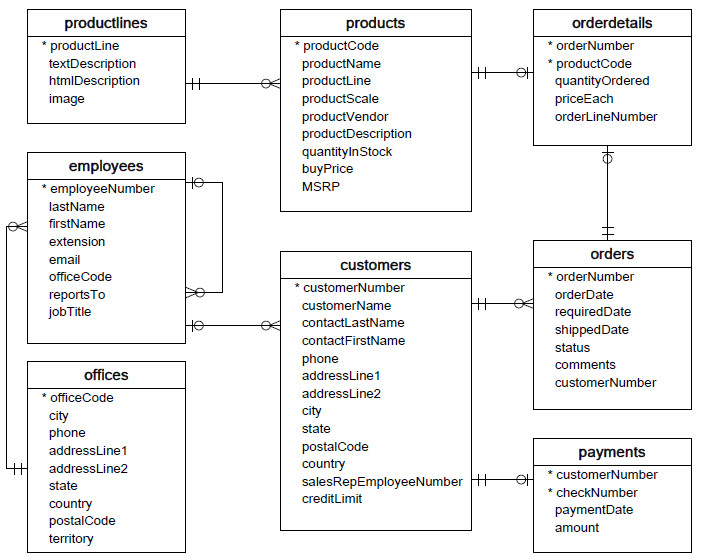

In [1]:
                               ################ Executer cette cellule OBLIGATOIREMENT #################

# Ici, nous importons simplement le fichier SQLite. Cette partie est spécifique à SQLite.
import requests
import sqlite3
import pandas as pd

# Envoyer une requête HTTP GET à l'URL spécifiée pour récupérer le fichier SQLite sur GitHub
r = requests.get('https://raw.githubusercontent.com/murpi/wilddata/master/quests/toys_and_models.sqlite')

# Cela télécharge et sauvegarde essentiellement le fichier SQLite localement nommé 'toys_and_models.sqlite' en mode écriture binaire ('wb') et
# permet d'y accèder sur ton environnement Google Colab.
open('toys_and_models.sqlite', 'wb').write(r.content)

# Ceci est le "connecteur". Pour une base de données sécurisée, c'est ici que vous indiquerez votre nom d'utilisateur et votre mot de passe.
conn = sqlite3.connect('toys_and_models.sqlite')

In [2]:
                     ################ Ceci est l'exemple à suivre pour exécuter vos requetes #################

# Voici un exemple de requête sql. La requête SQL est entre guillemets pour le premier argument, puis la variable conn en second argument.
pd.read_sql("select * from productlines", conn)

,productLine,textDescription,htmlDescription,image
0,Classic Cars,Attention car enthusiasts: Make your wildest c...,None,None
1,Motorcycles,Our motorcycles are state of the art replicas ...,None,None
2,Planes,"Unique, diecast airplane and helicopter replic...",None,None
3,Ships,The perfect holiday or anniversary gift for ex...,None,None
4,Trains,Model trains are a rewarding hobby for enthusi...,None,None
5,Trucks and Buses,The Truck and Bus models are realistic replica...,None,None
6,Vintage Cars,Our Vintage Car models realistically portray a...,None,None


### Question 1
Listez tous les produits avec leurs codes produits et noms.

In [3]:
pd.read_sql("""SELECT productCode, productName FROM products""", conn)

,productCode,productName
0,S10_1678,1969 Harley Davidson Ultimate Chopper
1,S10_1949,1952 Alpine Renault 1300
2,S10_2016,1996 Moto Guzzi 1100i
3,S10_4698,2003 Harley-Davidson Eagle Drag Bike
4,S10_4757,1972 Alfa Romeo GTA
...,...,...
105,S700_3505,The Titanic
106,S700_3962,The Queen Mary
107,S700_4002,American Airlines: MD-11S
108,S72_1253,Boeing X-32A JSF


### Question 2
Trouvez les noms de tous les clients ainsi que la ville où ils se trouvent.

In [4]:
pd.read_sql("""SELECT customerName, city
            FROM customers """, conn)

,customerName,city
0,Atelier graphique,Nantes
1,Signal Gift Stores,Las Vegas
2,"Australian Collectors, Co.",Melbourne
3,La Rochelle Gifts,Nantes
4,Baane Mini Imports,Stavern
...,...,...
117,Motor Mint Distributors Inc.,Philadelphia
118,Signal Collectibles Ltd.,Brisbane
119,"Double Decker Gift Stores, Ltd",London
120,Diecast Collectables,Boston


### Question 3
Récupérez le numéro de commande et la date de commande pour toutes les commandes passées par le client numéro 103.

In [6]:
pd.read_sql("""SELECT orderNumber,
                orderDate
                FROM orders
                WHERE customerNumber ="103" """, conn)

,orderNumber,orderDate
0,10123,2018-05-20
1,10298,2019-09-27
2,10345,2019-11-25


### Question 4
Obtenez le montant total des paiements effectués par chaque client. Affichez le numéro du client et le montant total des paiements.

In [8]:
pd.read_sql("""SELECT o.customerNumber,
              SUM(od.quantityOrdered * od.priceEach) AS "Montant total"
              FROM orders o
              LEFT JOIN orderdetails od ON o.orderNumber = od.orderNUmber
              group by o.customerNumber


              """, conn)

,customerNumber,Montant total
0,103,22314.36
1,112,80180.98
2,114,180585.07
3,119,116949.68
4,121,104224.79
...,...,...
93,486,77726.59
94,487,42570.37
95,489,29586.15
96,495,65541.74


### Question 5
Listez les noms des produits et leurs numéros de commande correspondants pour tous les produits commandés dans la commande numéro 10100.

In [11]:
pd.read_sql("""SELECT p.productName,
            od.orderNumber
              FROM orderdetails od
              JOIN products p ON p.productCode = od.productCode
              WHERE orderNumber = "10100" """, conn)

,productName,orderNumber
0,1917 Grand Touring Sedan,10100
1,1911 Ford Town Car,10100
2,1932 Alfa Romeo 8C2300 Spider Sport,10100
3,1936 Mercedes Benz 500k Roadster,10100


### Question 6
Affichez les noms des clients et les noms des produits qu'ils ont commandés.

In [20]:
pd.read_sql("""SELECT c.customerName,
              productName
            FROM customers c
            LEFT JOIN orders o ON o.customerNumber = c.customerNumber
            LEFT JOIN orderdetails od ON od.orderNumber = o.orderNumber
            LEFT JOIN products p  ON p.productCode = od.productCode
            WHERE productName IS NOT NULL
            ORDER BY o.orderNumber, od.orderLineNumber

             """, conn)

,customerName,productName
0,Online Diecast Creations Co.,1936 Mercedes Benz 500k Roadster
1,Online Diecast Creations Co.,1911 Ford Town Car
2,Online Diecast Creations Co.,1917 Grand Touring Sedan
3,Online Diecast Creations Co.,1932 Alfa Romeo 8C2300 Spider Sport
4,"Blauer See Auto, Co.",1928 Mercedes-Benz SSK
...,...,...
2644,Mini Gifts Distributors Ltd.,1996 Peterbilt 379 Stake Bed with Outrigger
2645,Mini Gifts Distributors Ltd.,2001 Ferrari Enzo
2646,Mini Gifts Distributors Ltd.,1969 Corvair Monza
2647,Mini Gifts Distributors Ltd.,1969 Ford Falcon


### Question 7
Listez les noms des employés et les noms de leurs clients.

In [21]:
pd.read_sql("""SELECT e.lastName,
                  c.customerName
                  FROM customers c
                  INNER JOIN employees e on c.salesRepEmployeeNumber = e.employeeNumber

                   """, conn)

,lastName,customerName
0,Hernandez,Atelier graphique
1,Thompson,Signal Gift Stores
2,Fixter,"Australian Collectors, Co."
3,Hernandez,La Rochelle Gifts
4,Jones,Baane Mini Imports
...,...,...
95,Vanauf,Motor Mint Distributors Inc.
96,Jennings,Signal Collectibles Ltd.
97,Bott,"Double Decker Gift Stores, Ltd"
98,Firrelli,Diecast Collectables


### Question 8
Trouvez les noms des produits, les quantités commandées et les prix de chaque commande pour les commandes expédiées.

In [26]:
pd.read_sql("""SELECT p.productName,
                od.quantityOrdered,
                od.priceEach
                FROM orderdetails od
                LEFT JOIN products p ON od.productCode = p.productCode
                LEFT JOIN orders o ON o.orderNumber = od.orderNumber
                WHERE status = "Shipped" """, conn)

,productName,quantityOrdered,priceEach
0,1917 Grand Touring Sedan,30,136.00
1,1911 Ford Town Car,50,55.09
2,1932 Alfa Romeo 8C2300 Spider Sport,22,75.46
3,1936 Mercedes Benz 500k Roadster,49,35.29
4,1932 Model A Ford J-Coupe,25,108.06
...,...,...,...
2530,1939 Cadillac Limousine,39,46.29
2531,1962 Volkswagen Microbus,20,120.12
2532,1936 Chrysler Airflow,33,97.39
2533,1980’s GM Manhattan Express,26,85.72


### Question 9
Affichez les détails des paiements (numéro de chèque, montant) et les informations des clients (nom, téléphone) pour chaque paiement effectué.

In [28]:
pd.read_sql("""
              SELECT p.checkNumber,
              p.amount,
              c.customerName,
              c.phone
              FROM customers c
              INNER JOIN payments p ON c.customerNumber = p.customerNumber

 """, conn)

,checkNumber,amount,customerName,phone
0,HQ336336,6066.78,Atelier graphique,40.32.2555
1,JM555205,14571.44,Atelier graphique,40.32.2555
2,OM314933,1676.14,Atelier graphique,40.32.2555
3,BO864823,14191.12,Signal Gift Stores,7025551838
4,HQ55022,32641.98,Signal Gift Stores,7025551838
...,...,...,...,...
244,PO860906,7310.42,"Double Decker Gift Stores, Ltd",(171) 555-7555
245,BH167026,59265.14,Diecast Collectables,6175552555
246,FN155234,6276.60,Diecast Collectables,6175552555
247,MB342426,32077.44,Kellys Gift Shop,+64 9 5555500


### Question 10
Obtenez une liste de tous les produits et le nom de la ligne de produits à laquelle ils appartiennent.

In [31]:
pd.read_sql("""SELECT p.productName,
                    pl.productLine
                    FROM products p
                    JOIN productlines pl ON pl.productline = p.productline """, conn)

,productName,productLine
0,1969 Harley Davidson Ultimate Chopper,Motorcycles
1,1952 Alpine Renault 1300,Classic Cars
2,1996 Moto Guzzi 1100i,Motorcycles
3,2003 Harley-Davidson Eagle Drag Bike,Motorcycles
4,1972 Alfa Romeo GTA,Classic Cars
...,...,...
105,The Titanic,Ships
106,The Queen Mary,Ships
107,American Airlines: MD-11S,Planes
108,Boeing X-32A JSF,Planes


### Question 11
Trouvez les produits dont la quantité en stock est inférieure à la quantité totale commandée. Affichez leurs noms et quantités en stock.

In [40]:
pd.read_sql("""SELECT p.productName,
                      p.quantityInStock
                FROM products p
                JOIN (SELECT productcode, SUM(quantityOrdered) as quantityordered
                  FROM orderdetails
                  group by productCode) j ON j.productCode = p.productCode

                WHERE p.quantityInStock < quantityordered
                  """, conn)


,productName,quantityInStock
0,1968 Ford Mustang,68
1,1911 Ford Town Car,540
2,1928 Mercedes-Benz SSK,548
3,1960 BSA Gold Star DBD34,15
4,1997 BMW F650 ST,178
5,1996 Peterbilt 379 Stake Bed with Outrigger,814
6,1928 Ford Phaeton Deluxe,136
7,2002 Yamaha YZR M1,600
8,The Mayflower,737
9,F/A 18 Hornet 1/72,551


### Question 12
Calculez le nombre moyen de produits par commande pour chaque client. Affichez le nom du client et le nombre moyen de produits par commande.

In [70]:
pd.read_sql("""
WITH count_product AS (

    SELECT
        orderNumber,
        SUM(quantityOrdered) AS quantityordered
    FROM orderdetails
    GROUP BY orderNumber)

SELECT
    c.customerName,
    AVG(cp.quantityordered) AS moyenne_produits
FROM customers c
JOIN orders o ON c.customerNumber = o.customerNumber
JOIN count_product cp ON o.orderNumber = cp.orderNumber
GROUP BY c.customerName
ORDER BY moyenne_produits DESC
""", conn)

,customerName,moyenne_produits
0,"AV Stores, Co.",592.666667
1,Rovelli Gifts,550.000000
2,"Vida Sport, Ltd",539.000000
3,Scandinavian Gift Ideas,521.500000
4,Martas Replicas Co.,488.000000
...,...,...
93,Frau da Collezione,136.000000
94,Auto-Moto Classics Inc.,95.666667
95,Atelier graphique,90.000000
96,Royale Belge,69.500000


### Question 13
Trouvez les employés dont les clients ont passé des commandes d'un montant total supérieur à 400,000 dollars. Affichez les noms des employés et le montant total des commandes de leurs clients.

Triez le résultat pour vérifier.

In [76]:
pd.read_sql("""
                SELECT e.firstName, e.lastName,
                SUM (od.quantityOrdered * od.priceEach) AS totalSales
                FROM customers c
                JOIN employees e ON c.salesRepEmployeeNumber = e.employeeNumber
                JOIN orders o ON c.customerNumber = o.customerNumber
                JOIN orderdetails od ON od.orderNumber = o.orderNumber
                GROUP BY e.firstName, e.lastName
                HAVING totalSales > 400000
                ORDER BY totalSales
""", conn)

,firstName,lastName,totalSales
0,Peter,Marsh,416923.92
1,Steve,Patterson,418925.36
2,Mami,Nishi,452978.58
3,Foon Yue,Tseng,459142.29
4,Andy,Fixter,479537.30
5,Loui,Bondur,492709.87
6,George,Vanauf,597351.23
7,Barry,Jones,676887.37
8,Larry,Bott,694837.85
9,Pamela,Castillo,741394.75


### Question 14
Listez les trois produits les plus vendus en termes de quantité commandée. Affichez les noms des produits et les quantités totales commandées.

In [86]:
pd.read_sql(""" SELECT p.productname,
                  SUM(od.quantityOrdered) AS totalQuantity
                  FROM products p
                  JOIN orderdetails od on od.productCode = p.productCode
                  GROUP BY productname
                  ORDER BY totalQUantity DESC
                  LIMIT 3""", conn)

,productName,totalQuantity
0,1992 Ferrari 360 Spider red,1561
1,1937 Lincoln Berline,960
2,2001 Ferrari Enzo,950


### Question 15
Trouvez les clients qui n'ont jamais effectué de paiement. Affichez leurs noms et numéros de client.

In [81]:
pd.read_sql("""SELECT contactFirstName,
              contactLastName,
              c.customerNumber
              FROM customers c
              LEFT JOIN payments p ON c.customerNumber = p.customerNumber
              WHERE checkNumber IS NULL""", conn)

,contactFirstName,contactLastName,customerNumber
0,Zbyszek,Piestrzeniewicz,125
1,Keith,Franco,168
2,Isabel,de Castro,169
3,Brydey,Walker,206
4,Horst,Kloss,223
5,Alejandra,Camino,237
6,Renate,Messner,247
7,Peter,Franken,273
8,Ed,Harrison,293
9,Bradley,Schuyler,303


### Question 16 (Bonus)
Calculez la durée moyenne entre la date de commande et la date d'expédition pour toutes les commandes expédiées. Affichez le résultat en jours.

In [87]:
#Indice : Vous pouvez utiliser julianday une fonction SQLite qui nous permets de
#convertir une date en un nombre représentant le nombre de jours depuis le
# début du calendrier julien
pd.read_sql("""
      SELECT
      orderNumber,
      JULIANDAY(shippedDate) - JULIANDAY(orderDate) AS jours_livraison
      FROM orders
      WHERE shippedDate AND orderDate IS NOT NULL
       """, conn)

,orderNumber,jours_livraison
0,10100,4.0
1,10101,2.0
2,10102,4.0
3,10103,4.0
4,10104,1.0
...,...,...
273,10378,1.0
274,10379,1.0
275,10380,2.0
276,10381,1.0


In [90]:
#Réponse à la question
pd.read_sql("""
      WITH count_day AS (SELECT
      orderNumber,
      JULIANDAY(shippedDate) - JULIANDAY(orderDate) AS jours_livraison
      FROM orders
      WHERE shippedDate AND orderDate IS NOT NULL)

      SELECT AVG(jours_livraison) AS moyenne_durée
      FROM count_day

       """, conn)



,moyenne_durée
0,3.755396
